# KNN CLASSIFICATION

This notebook will be exclusively for running KNN classifications using three datasets prepared on the 2018-2019_Subset_Data_Cleeaning and 2000-2020_Data_Cleaning_Conditioning Jupyter Notebooks.

The first dataset (2018-2019) forms a part of the testing process done to verify before hand is this project to predict the winners by Home Teams would work, and if it did work, then the idea was to add the other datasets. At this point it was already proven that it did work for 1 year, so in this Notebook you will see the results of that model and then further down, the addition of larger datasets including 10 and 20 years of basketball stats. 

For more details on the data sets, please refer to the README where you can find the sources and an explanation of how the dataset was created. 

# 2018 - 2019 Test Dataset

## Libraries and Data Loading

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

In [5]:
df = pd.read_csv('2018-2019_Model_Ready.csv', index_col=0)
df.head(2).append(df.tail(2))

,Game_Result,Team1_OFFRTG,Team1_DEFRTG,Team1_AST/TO,Team1_REB_P,Team1_FG_P,Team1_FGA,Team1_PACE,Team1_3PA,Team1_3P_P,Team2_OFFRTG,Team2_DEFRTG,Team2_AST/TO,Team2_REB_P,Team2_FG_P,Team2_FGA,Team2_PACE,Team2_3PA,Team2_3P_P
0,1,106.3,107.5,1.83,51.1,43.5,93.1,104.39,35.9,33.8,100.8,96.2,1.66,50.6,41.8,89.3,101.50,33.6,32.8
1,1,102.4,105.0,1.30,50.8,42.8,93.8,106.08,29.7,27.5,120.3,107.5,2.00,51.1,52.4,89.1,104.00,31.9,41.8
1276,1,111.5,105.4,2.36,48.3,46.3,90.2,100.80,33.2,36.1,113.0,110.9,1.86,50.7,47.4,93.2,109.70,37.8,33.3
1277,1,126.0,103.9,2.65,49.0,48.2,94.2,102.10,53.6,41.4,113.7,103.7,2.02,49.4,50.6,92.5,103.42,35.7,41.1


## KNN Model

In [6]:
y = df['Game_Result']
X = df.drop(['Game_Result'], axis=1)

In [7]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

Since KNN is a distance-based classifier, if data is in different scales, then larger scaled features have a larger impact on the distance between points

In [8]:
# Instantiate StandardScaler
scaler = StandardScaler()

# Transform the training and test sets
scaled_data_train = scaler.fit_transform(X_train) 
scaled_data_test = scaler.transform(X_test)

# Convert into a DataFrame
scaled_df_train = pd.DataFrame(scaled_data_train, columns=X.columns)
scaled_df_train.head()

,Team1_OFFRTG,Team1_DEFRTG,Team1_AST/TO,Team1_REB_P,Team1_FG_P,Team1_FGA,Team1_PACE,Team1_3PA,Team1_3P_P,Team2_OFFRTG,Team2_DEFRTG,Team2_AST/TO,Team2_REB_P,Team2_FG_P,Team2_FGA,Team2_PACE,Team2_3PA,Team2_3P_P
0,-0.379392,0.417546,-1.101766,-0.604676,-0.337516,-0.559669,-0.525387,0.719092,0.973258,0.969020,0.879702,0.325376,0.605448,1.384720,1.201549,2.252532,-0.869222,0.605130
1,-1.149107,1.096517,-1.136027,-3.196884,-1.382358,0.232148,1.806706,0.637973,-1.174885,-0.173740,-0.190568,-0.813500,-1.034019,1.828016,0.459596,2.382581,-1.471744,1.640316
2,1.010370,0.487784,0.439977,0.547416,1.652660,-0.718033,-0.438206,-1.248049,2.973253,-1.184642,0.018833,-0.635551,-0.166066,-1.422821,-1.240712,-1.738103,0.516580,-0.430057
3,0.539989,-1.151112,0.474238,1.555497,0.359046,-0.052906,-1.270058,-0.315178,0.565852,0.353688,0.251500,-0.493191,1.521621,0.399618,0.552340,1.152692,-0.728633,-0.910679
4,-0.379392,1.611599,-0.450808,-1.276730,0.160028,-0.591342,-0.078584,-0.355738,1.417701,-0.789072,-0.469769,0.147427,0.509009,-1.275056,1.139720,1.390496,0.717420,-0.651882


### Fitting the Model

In [9]:
# Instantiate KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=10)

# Fit the classifier
clf.fit(scaled_data_train, y_train)

# Predict on the test set
test_preds = clf.predict(scaled_data_test)

### Evaluating the Model

In [10]:
def print_metrics(y, preds):
    print("Precision Score: {}".format(precision_score(y, preds)))
    print("Recall Score: {}".format(recall_score(y, preds)))
    print("Accuracy Score: {}".format(accuracy_score(y, preds)))
    print("F1 Score: {}".format(f1_score(y, preds)))
    
print_metrics(y_test, test_preds)

Precision Score: 0.71875
Recall Score: 0.7666666666666667
Accuracy Score: 0.6778523489932886
F1 Score: 0.7419354838709677


As a first model the results aren't bad with an accuracy of 67.78% with a n_neighbors = 10) and without tuning the model.  

On the next step I will try to refine this model and see if by finding the best_K() might improve it's performance

### Attempt to improve the model performance

In [11]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds)
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("The best Value for k is: {}".format(best_k))
    print("The best F1 score is: {}".format(best_score))

In [12]:
find_best_k(scaled_data_train, y_train, scaled_data_test, y_test)

The best Value for k is: 25
The best F1 score is: 0.8020050125313283


I will refit the model with k=25 and re-evaluate it to see how the 4 metrics change and if the increase can justify such a jump from 10 to 25. 

In [13]:
# Instantiate KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=25)

# Fit the classifier
clf.fit(scaled_data_train, y_train)

# Predict on the test set
test_preds = clf.predict(scaled_data_test)

In [14]:
def print_metrics(y, preds):
    print("Precision Score: {}".format(precision_score(y, preds)))
    print("Recall Score: {}".format(recall_score(y, preds)))
    print("Accuracy Score: {}".format(accuracy_score(y, preds)))
    print("F1 Score: {}".format(f1_score(y, preds)))
    
print_metrics(y_test, test_preds)

Precision Score: 0.730593607305936
Recall Score: 0.8888888888888888
Accuracy Score: 0.7348993288590604
F1 Score: 0.8020050125313283


All the metrics have increased, however, such a small increase doesn't justify such a big jump with the K value. What I will do, since it is advisable to use odd numbers for k, I will run it for k=11 and see what comes out of it. 

In [15]:
# Instantiate KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=11)

# Fit the classifier
clf.fit(scaled_data_train, y_train)

# Predict on the test set
test_preds = clf.predict(scaled_data_test)

In [16]:
def print_metrics(y, preds):
    print("Precision Score: {}".format(precision_score(y, preds)))
    print("Recall Score: {}".format(recall_score(y, preds)))
    print("Accuracy Score: {}".format(accuracy_score(y, preds)))
    print("F1 Score: {}".format(f1_score(y, preds)))
    
print_metrics(y_test, test_preds)

Precision Score: 0.7077625570776256
Recall Score: 0.8611111111111112
Accuracy Score: 0.7013422818791947
F1 Score: 0.7769423558897244


This seems to be a considerably better value for K, as with an increase of +1, Recall (+10%), Accuracy (+3%), and F1_score (+3%) have all increased, and the drop in Precision is only a -1% 

============================================================================================

### Model Test I

This will be only for 1 season dataset and for 1 team in particular: San Antonio Spurs

In [243]:
df_SAS = pd.read_csv('df_SAS_1S.csv', index_col=0)
df_SAS.head(2)

,Game_Result,Team1_OFFRTG,Team1_DEFRTG,Team1_AST/TO,Team1_REB_P,Team1_FG_P,Team1_FGA,Team1_PACE,Team1_3PA,Team1_3P_P,Team2_OFFRTG,Team2_DEFRTG,Team2_AST/TO,Team2_REB_P,Team2_FG_P,Team2_FGA,Team2_PACE,Team2_3PA,Team2_3P_P
9,1,111.4,114.2,1.64,48.7,44.8,92.4,103.94,28.9,38.1,111.9,110.6,2.02,50.8,46.6,91.7,99.33,22.3,39.1
57,0,112.1,105.5,1.67,49.2,50.6,86.0,97.13,22.3,41.6,111.9,110.6,2.02,50.8,46.6,91.7,99.33,22.3,39.1


In [317]:
df_MIA.shape

(40, 19)

In [244]:
df_SAS.Game_Result.value_counts()

1    33
0     9
Name: Game_Result, dtype: int64

42 is the normal number of home games, of which SAS won 33 or ~79% of the games.

Now to the Modeling:

<b>Target (y) and Features (X) definition, splitting data, and verifying the split</b>

In [256]:
# Define X and y
y = df_SAS['Game_Result']
X = df_SAS.drop(columns=['Game_Result'], axis=1)

# Splitting the data into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Print the value_counts() for y_train and y_test to verify the split
print(y_train.value_counts(), '\n\n', y_test.value_counts())

1    23
0     8
Name: Game_Result, dtype: int64 

 1    10
0     1
Name: Game_Result, dtype: int64


<b>Scaling the data</b>

In [257]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

<b>Training and Predictions</b>

In [282]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

<b>Evaluating the Algorithm</b>

In [283]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 1  0]
 [ 0 10]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       1.00      1.00      1.00        10

    accuracy                           1.00        11
   macro avg       1.00      1.00      1.00        11
weighted avg       1.00      1.00      1.00        11



This results are suggesting that the KNN algorithm was able to classify all the records in the test set with a 100% accuracy, which is excellent, but seems odd to me. The algorithm is performing extremely well on this dataset. Is it because of the number of samples being too low? or not enough categories? It is known that the KNN algorithm doesn't always perform as well with high-dimensionality or categorical features, but on this data there are no categoricals but the target (Game_Result)

I will still explore a bit more to try to understand this better because I am not 100% convinced that this is giving correct results

Let's look first at the predictions and compare them with the true values:

In [284]:
print("True:     ", y_test.values[0:30]) # These are the real values
print("Predicted:", y_pred[0:30]) # These correspond to the predicted values

True:      [1 1 0 1 1 1 1 1 1 1 1]
Predicted: [1 1 0 1 1 1 1 1 1 1 1]


There are 11 values to predict, so really it is not a large dataset and hence it does seem possible as the prediction above suggest 

It is known that there is no way to know beforehand the best value for K to yield the best results on the first attempt. I chose 3 thinking on the size of the data, but I could as well have chosen 5, 7, 9 or 11 as I have done for the other larger datasets. It turned out that 3 was enough to yield a 100% accuracy. I also tested 5 and 7 and the result was the same. 

What I will do next, just to double check that those are good/or the best values for k, I will plot the "mean error" for the predicted values of the test set for all the k values between 1 and 25, which is the value suggested as ideal for the entire 2018-2019 dataset (for all teams).

First I will need to calculate the mean of the error for all the predicted values where k ranges between 1 and 25:

In [285]:
error = []

# Calculating error for K values between 1 and 25
for i in range(1, 25):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Now that I have the error, I will plot it against the k values:

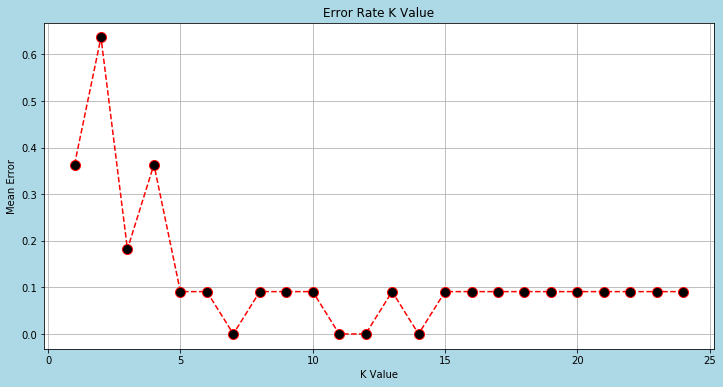

In [286]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 25), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='black', markersize=10)
plt.title('Error Rate K Value')
plt.rcParams["figure.facecolor"] = "lightblue"
plt.grid(True)
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

From the plot we are getting all the different values where the Mean Error is equal to zero as: 7, 11, 12, and 14. I tested a few of these different values and all with the same result. In this came the sample is quite small so it is not that unusual 

Lets head now to the second example, the team of the Miami Heat and see what happens when the team has a different record and just barely wins half their games

### Model Test II

In [189]:
df_MIA = pd.read_csv('df_MIA_1S.csv', index_col=0)
df_MIA.head(2)

,Game_Result,Team1_OFFRTG,Team1_DEFRTG,Team1_AST/TO,Team1_REB_P,Team1_FG_P,Team1_FGA,Team1_PACE,Team1_3PA,Team1_3P_P,Team2_OFFRTG,Team2_DEFRTG,Team2_AST/TO,Team2_REB_P,Team2_FG_P,Team2_FGA,Team2_PACE,Team2_3PA,Team2_3P_P
30,0,114.9,109.1,2.09,49.2,46.3,91.0,100.44,34.5,37.7,108.9,107.6,1.37,53.6,43.6,91.4,102.71,33.9,35.4
53,1,105.2,109.8,1.39,51.0,43.1,91.8,100.56,30.8,36.2,108.9,107.6,1.37,53.6,43.6,91.4,102.71,33.9,35.4


In [319]:
df_MIA.shape

(40, 19)

In [320]:
df_MIA.Game_Result.value_counts()

0    21
1    19
Name: Game_Result, dtype: int64

The Miami Heat won 52.5% of their Home Games, so not very impressive and not a team I would personally like to make a bet on. Still lets see how the algorithm behave here

<b>Target (y) and Features (X) definition, splitting data, and verifying the split</b>

In [325]:
# Define X and y
y = df_MIA['Game_Result']
X = df_MIA.drop(columns=['Game_Result'], axis=1)

# Splitting the data into training and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.275, random_state=0)

# Print the value_counts() for y_train and y_test to verify the split
print(y_train.value_counts(), '\n\n', y_test.value_counts())

0    16
1    13
Name: Game_Result, dtype: int64 

 1    6
0    5
Name: Game_Result, dtype: int64


Once again, we have a very small test sample with 10 games...

<b>Scaling the data</b>

In [326]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

<b>Training and Predictions</b>

In [341]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

<b>Evaluating the algorithm</b>

In [342]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1 4]
 [0 6]]
              precision    recall  f1-score   support

           0       1.00      0.20      0.33         5
           1       0.60      1.00      0.75         6

    accuracy                           0.64        11
   macro avg       0.80      0.60      0.54        11
weighted avg       0.78      0.64      0.56        11



An accuracy of 64 is a bit high compared to the number of games that the Miami Heat won at home. Let's quickly check the predictions and compared them to the True values:

In [343]:
print("True:     ", y_test.values[0:11]) # These are the real values
print("Predicted:", y_pred[0:11]) # These correspond to the predicted values

True:      [1 0 0 1 0 1 1 1 0 1 0]
Predicted: [1 1 0 1 1 1 1 1 1 1 1]


The games won are not a problem, the issue is with the Home Games lost, the algorithm is over predicted the Miami Heat's success at home here.

Now I will do the same exercise as for the previous Model Test I where I tried to determine the best K value:

In [344]:
error = []

# Calculating error for K values between 1 and 25
for i in range(1, 25):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

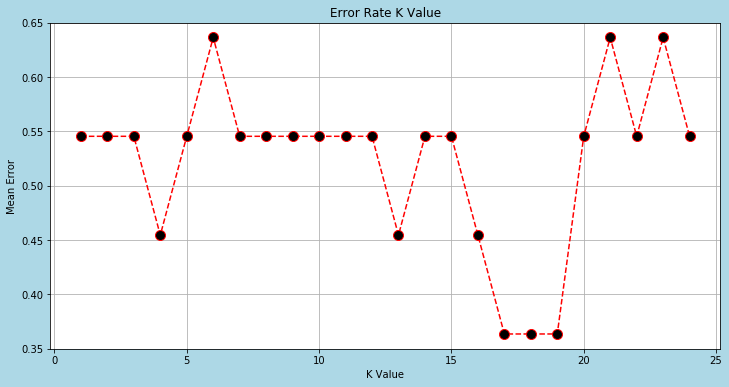

In [332]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 25), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='black', markersize=10)
plt.title('Error Rate K Value')
plt.rcParams["figure.facecolor"] = "lightblue"
plt.grid(True)
plt.xlabel('K Value')
plt.ylabel('Mean Error')
plt.show()

According to th Error Rate vs K-Value plot, there is not a single k value that will give an error equal to zero, but the best ones are quite high, at 17, 18, and 19. Just to for fun I will briefly test them and if one give a better accuracy then I will keep it, if not then you will know since I kept the original 3 value. 

# 2010 - 2020 Dataset

As this are a pair of cleaned data sets they have not been loaded, so I will proceed to do it and display 3 of their rows for a quick QC.

In [36]:
df1 = pd.read_csv('2010-2020_Model_Ready.csv', index_col=0)
print("df1:")
display(df1.head(3))
df2 = pd.read_csv('2000-2010_Model_Ready.csv', index_col=0)
print("=============================================================================")
print("df2:")
display(df2.head(3))

df1:


,Game_Result,Team1_FGA,Team1_FG_P,Team1_3PA,Team1_3P_P,Team1_OFFRTG,Team1_DEFRTG,Team1_REB_P,Team1_AST/TO,Team1_PACE,Team2_FGA,Team2_FG_P,Team2_3PA,Team2_3P_P,Team2_OFFRTG,Team2_DEFRTG,Team2_REB_P,Team2_AST/TO,Team2_PACE
0,1,96.0,46.5,43.2,38.0,112.2,114.2,46.9,1.89,106.09,86.8,46.3,36.8,38.0,107.5,99.1,51.1,1.26,104.23
1,1,87.5,45.7,29.0,33.6,107.9,96.8,51.4,1.54,101.00,84.0,49.6,29.5,36.7,112.9,107.5,49.6,1.35,101.50
2,1,94.0,41.1,36.2,29.3,103.7,109.6,45.2,1.81,101.80,86.0,46.3,35.8,41.9,104.9,114.2,47.3,1.30,103.00


df2:


,Game_Result,Team1_FGA,Team1_FG_P,Team1_3PA,Team1_3P_P,Team1_OFFRTG,Team1_DEFRTG,Team1_REB_P,Team1_AST/TO,Team1_PACE,Team2_FGA,Team2_FG_P,Team2_3PA,Team2_3P_P,Team2_OFFRTG,Team2_DEFRTG,Team2_REB_P,Team2_AST/TO,Team2_PACE
0,0,62.0,56.5,9.0,55.6,114.0,89.1,56.6,0.94,92.5,81.0,37.0,15.0,40.0,89.1,114.0,43.4,1.08,92.5
1,0,78.0,41.0,7.0,28.6,87.8,83.7,52.3,0.84,98.0,85.0,36.5,10.0,30.0,83.7,87.8,47.7,1.60,98.0
2,1,72.0,45.8,7.0,57.1,87.8,99.0,53.3,0.74,98.0,79.0,43.0,16.0,37.5,99.0,87.8,46.7,1.33,98.0


Now to the modeling part, so I start by defining my target/Y (Game_Result) and my features (X below)

In [37]:
y = df1['Game_Result']
X = df1.drop(['Game_Result'], axis=1)

Now we split the data with a test_size of 25% and a random_state of 42

In [38]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [39]:
# Instantiate StandardScaler
scaler = StandardScaler()

# Transform the training and test sets
scaled_data_train = scaler.fit_transform(X_train) 
scaled_data_test = scaler.transform(X_test)

# Convert into a DataFrame
scaled_df_train = pd.DataFrame(scaled_data_train, columns=X.columns)
scaled_df_train.head()

,Team1_FGA,Team1_FG_P,Team1_3PA,Team1_3P_P,Team1_OFFRTG,Team1_DEFRTG,Team1_REB_P,Team1_AST/TO,Team1_PACE,Team2_FGA,Team2_FG_P,Team2_3PA,Team2_3P_P,Team2_OFFRTG,Team2_DEFRTG,Team2_REB_P,Team2_AST/TO,Team2_PACE
0,0.631796,0.302185,1.057023,0.134148,0.890019,0.225910,1.203354,0.401879,-0.214962,0.110644,1.435174,-0.204884,-0.443704,1.717849,0.702136,-0.430388,1.462444,-0.556086
1,-0.962900,0.627413,-0.190766,0.903198,1.471459,1.054991,-0.238876,0.670758,-0.959686,0.110644,-0.132162,-0.278170,-1.121423,-0.551846,-0.483582,1.017793,-0.540576,0.519703
2,1.490478,-0.534115,0.205590,-0.942522,-0.754054,0.778631,0.070173,-1.134575,2.011507,-0.477445,0.651506,0.205515,0.511262,0.432358,-0.674143,0.552306,0.537973,-0.275001
3,1.097937,-1.695644,1.321260,-0.450330,-1.195147,1.182542,-1.578089,0.478702,1.657121,1.262319,0.559310,1.246172,0.141598,1.195619,0.257492,0.759189,0.383895,1.345070
4,0.558194,0.395108,0.660666,-0.296520,0.729621,1.246317,-0.187368,0.325056,0.439882,-0.085385,1.020291,0.190858,1.250591,0.512702,0.765656,-0.430388,0.268336,0.662800


## Fitting the Model

In [42]:
# Instantiate KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=11) 

# I will start with 11 as it was the most appropriate k number from the previous exercise for the 1 season

# Fit the classifier
clf.fit(scaled_data_train, y_train)

# Predict on the test set
test_preds = clf.predict(scaled_data_test)

## Evaluating the Model

In [43]:
def print_metrics(y, preds):
    print("Precision Score: {}".format(precision_score(y, preds)))
    print("Recall Score: {}".format(recall_score(y, preds)))
    print("Accuracy Score: {}".format(accuracy_score(y, preds)))
    print("F1 Score: {}".format(f1_score(y, preds)))
    
print_metrics(y_test, test_preds)

Precision Score: 0.6969246031746031
Recall Score: 0.7827298050139275
Accuracy Score: 0.6718032786885246
F1 Score: 0.7373392810286014


## Attempt to Improve the Model

In [44]:
def find_best_k(X_train, y_train, X_test, y_test, min_k=1, max_k=25):
    best_k = 0
    best_score = 0.0
    
    for k in range(min_k, max_k+1, 2):
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        preds = knn.predict(X_test)
        f1 = f1_score(y_test, preds)
        if f1 > best_score:
            best_k = k
            best_score = f1
    
    print("The best Value for k is: {}".format(best_k))
    print("The best F1 score is: {}".format(best_score))

In [45]:
find_best_k(scaled_data_train, y_train, scaled_data_test, y_test)

The best Value for k is: 25
The best F1 score is: 0.7532333160889808


I will refit the model with k=25 and re-evaluate it to see how the 4 metrics change and if the increase can justify such a jump from 11 to 25, I doubt it but worth checking

In [46]:
# Instantiate KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=25)

# Fit the classifier
clf.fit(scaled_data_train, y_train)

# Predict on the test set
test_preds = clf.predict(scaled_data_test)

In [47]:
def print_metrics(y, preds):
    print("Precision Score: {}".format(precision_score(y, preds)))
    print("Recall Score: {}".format(recall_score(y, preds)))
    print("Accuracy Score: {}".format(accuracy_score(y, preds)))
    print("F1 Score: {}".format(f1_score(y, preds)))
    
print_metrics(y_test, test_preds)

Precision Score: 0.7030420086914534
Recall Score: 0.811142061281337
Accuracy Score: 0.6872131147540984
F1 Score: 0.7532333160889808


an increase in the accuracy of 1.6% cannot justify such an increment on the k number, therefore I am keeping it equal to 11 which resulted in an accuracy of 67.18%

## Model Test I

In [125]:
df_SAS = pd.read_csv('df_merge_a.csv', index_col=0)
df_SAS.head(2)

,Team1,Team1Score,Team2,Team2Score,year,month,Game_Result,Team1_year,Team1_month,Team1_FGA,Team1_FG_P,Team1_3PA,Team1_3P_P,Team1_OFFRTG,Team1_DEFRTG,Team1_REB_P,Team1_AST/TO,Team1_PACE,Team2_year,Team2_month,Team2_FGA,Team2_FG_P,Team2_3PA,Team2_3P_P,Team2_OFFRTG,Team2_DEFRTG,Team2_REB_P,Team2_AST/TO,Team2_PACE
0,New Orleans Pelicans,122,Toronto Raptors,130,2019,10,1,2019.0,10.0,96.0,46.5,43.2,38.0,112.2,114.2,46.9,1.89,106.09,2019.0,10.0,86.8,46.3,36.8,38.0,107.5,99.1,51.1,1.26,104.23
1,Los Angeles Lakers,102,Los Angeles Clippers,112,2019,10,1,2019.0,10.0,87.5,45.7,29.0,33.6,107.9,96.8,51.4,1.54,101.00,2019.0,10.0,84.0,49.6,29.5,36.7,112.9,107.5,49.6,1.35,101.50


In [126]:
df_SAS = df_SAS[df_SAS['Team2'] == 'San Antonio Spurs']

In [128]:
df_SAS = df_SAS.drop(['Team1', 'Team1Score', 'Team2Score', 'Team2', 'year', 'month', 'Team1_month', 'Team2_month', 'Team1_year', 'Team2_year'], axis=1)

In [131]:
df_SAS.Game_Result.value_counts() 

1    334
0     81
Name: Game_Result, dtype: int64

In [132]:
y = df_SAS['Game_Result']
X = df_SAS.drop(['Game_Result'], axis=1)

In [134]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [136]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [138]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=11)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [140]:
y_pred = clf.predict(X_test)

In [141]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 0 25]
 [ 0 79]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        25
           1       0.76      1.00      0.86        79

    accuracy                           0.76       104
   macro avg       0.38      0.50      0.43       104
weighted avg       0.58      0.76      0.66       104



In [143]:
print_metrics(y_test, y_pred)

Precision Score: 0.7596153846153846
Recall Score: 1.0
Accuracy Score: 0.7596153846153846
F1 Score: 0.8633879781420765


## Model Test II

In [144]:
df_MIA = pd.read_csv('df_merge_a.csv', index_col=0)
df_MIA.head(2)

,Team1,Team1Score,Team2,Team2Score,year,month,Game_Result,Team1_year,Team1_month,Team1_FGA,Team1_FG_P,Team1_3PA,Team1_3P_P,Team1_OFFRTG,Team1_DEFRTG,Team1_REB_P,Team1_AST/TO,Team1_PACE,Team2_year,Team2_month,Team2_FGA,Team2_FG_P,Team2_3PA,Team2_3P_P,Team2_OFFRTG,Team2_DEFRTG,Team2_REB_P,Team2_AST/TO,Team2_PACE
0,New Orleans Pelicans,122,Toronto Raptors,130,2019,10,1,2019.0,10.0,96.0,46.5,43.2,38.0,112.2,114.2,46.9,1.89,106.09,2019.0,10.0,86.8,46.3,36.8,38.0,107.5,99.1,51.1,1.26,104.23
1,Los Angeles Lakers,102,Los Angeles Clippers,112,2019,10,1,2019.0,10.0,87.5,45.7,29.0,33.6,107.9,96.8,51.4,1.54,101.00,2019.0,10.0,84.0,49.6,29.5,36.7,112.9,107.5,49.6,1.35,101.50


In [145]:
df_MIA = df_MIA[df_MIA['Team2'] == 'Miami Heat']

In [147]:
df_MIA = df_MIA.drop(['Team1', 'Team1Score', 'Team2Score', 'Team2', 'year', 'month', 'Team1_month', 'Team2_month', 'Team1_year', 'Team2_year'], axis=1)

In [148]:
df_MIA.Game_Result.value_counts() 

1    281
0    128
Name: Game_Result, dtype: int64

In [149]:
y = df_MIA['Game_Result']
X = df_MIA.drop(['Game_Result'], axis=1)

In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [151]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [152]:
clf = KNeighborsClassifier(n_neighbors=11)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [153]:
y_pred = clf.predict(X_test)

In [154]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 8 22]
 [16 57]]
              precision    recall  f1-score   support

           0       0.33      0.27      0.30        30
           1       0.72      0.78      0.75        73

    accuracy                           0.63       103
   macro avg       0.53      0.52      0.52       103
weighted avg       0.61      0.63      0.62       103



In [155]:
print_metrics(y_test, y_pred)

Precision Score: 0.7215189873417721
Recall Score: 0.7808219178082192
Accuracy Score: 0.6310679611650486
F1 Score: 0.7500000000000001


# 2000 - 2020 Dataset

In [118]:
print('Shape of df1:', df1.shape)
print('Shape of df2:', df2.shape)

Shape of df1: (12198, 19)
Shape of df2: (15782, 19)


In [119]:
df3 = df1.append(df2)
print('Shape of df3:', df3.shape) # the shape of df3 should be the result of adding df1 + df2

Shape of df3: (27980, 19)


In [120]:
# Defininf target and features
y = df3['Game_Result']
X = df3.drop(['Game_Result'], axis=1)

In [121]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [122]:
# Instantiate StandardScaler
scaler = StandardScaler()

# Transform the training and test sets
scaled_data_train = scaler.fit_transform(X_train) 
scaled_data_test = scaler.transform(X_test)

# Convert into a DataFrame
scaled_df_train = pd.DataFrame(scaled_data_train, columns=X.columns)
scaled_df_train.head()

,Team1_FGA,Team1_FG_P,Team1_3PA,Team1_3P_P,Team1_OFFRTG,Team1_DEFRTG,Team1_REB_P,Team1_AST/TO,Team1_PACE,Team2_FGA,Team2_FG_P,Team2_3PA,Team2_3P_P,Team2_OFFRTG,Team2_DEFRTG,Team2_REB_P,Team2_AST/TO,Team2_PACE
0,0.980672,0.292450,-0.295799,0.514467,0.859482,-1.197297,0.372692,2.252454,-0.104554,0.120772,-1.168202,-0.544569,0.598336,-1.032387,0.107868,-0.371816,0.022602,-0.919336
1,-0.166305,-0.427128,-0.324989,-0.701506,-0.002269,0.496033,-0.294712,-1.148796,0.683883,-0.399469,-0.900958,0.155562,0.120080,-0.953587,1.310573,-2.267120,-0.753150,0.069182
2,1.052358,-0.427128,-0.719058,0.136164,0.467777,0.227578,0.680725,-0.646338,1.256815,-0.115701,0.479798,-0.792532,0.678046,0.839114,0.841722,-1.191407,0.138964,-0.270785
3,-0.022933,0.922080,0.959381,0.703618,1.212016,-0.515835,2.066872,-0.143881,-0.130836,-1.037946,2.350501,0.272250,0.757755,1.174015,1.310573,-1.754875,0.720778,0.526829
4,0.813405,0.112555,0.025293,-0.080009,-0.374389,0.991641,0.988758,-1.110145,0.731189,-0.706884,0.747041,-0.325778,0.624906,0.011714,-0.401753,0.191653,0.604415,0.040415


## Fitting the Model

In [123]:
# Instantiate KNeighborsClassifier
clf = KNeighborsClassifier(n_neighbors=11) 

# I will start with 11 as it was the most appropriate k number from the previous exercise for the 1 season

# Fit the classifier
clf.fit(scaled_data_train, y_train)

# Predict on the test set
test_preds = clf.predict(scaled_data_test)

## Evaluating the Model

In [124]:
def print_metrics(y, preds):
    print("Precision Score: {}".format(precision_score(y, preds)))
    print("Recall Score: {}".format(recall_score(y, preds)))
    print("Accuracy Score: {}".format(accuracy_score(y, preds)))
    print("F1 Score: {}".format(f1_score(y, preds)))
    
print_metrics(y_test, test_preds)

Precision Score: 0.7119219346627068
Recall Score: 0.8021032504780115
Accuracy Score: 0.6874910650464617
F1 Score: 0.7543268150146101


Surprisingly for me this model is slightly closer to the predictions that the NBA Analysts make. The model has an accuracy of 68.74% whereas the NBA has 76%. It is not a great improvement but it did improve over 1%. Still there is not a big difference between thee three datasets. The idea would be to try to predict for specific teams and not for all the Home Teams. That needs to be done as part of the process for better betting. 

## Model Test I

In [166]:
df_SAS_a = pd.read_csv('df_merge_a.csv', index_col=0)
df_SAS_b = pd.read_csv('df_merge_b.csv', index_col=0)

In [167]:
df_SAS_a = df_SAS_a[df_SAS_a['Team2'] == 'San Antonio Spurs']
df_SAS_b = df_SAS_b[df_SAS_b['Team2'] == 'San Antonio Spurs']
df_SAS_2 = df_SAS_a.append(df_SAS_b) # This will append both DataFrames
print('Shape of df_SAS_a:', df_SAS_a.shape)
print('Shape of df_SAS_b:', df_SAS_b.shape)
print('Shape of new DataFrame:', df_SAS_2.shape)

Shape of df_SAS_a: (415, 29)
Shape of df_SAS_b: (534, 29)
Shape of new DataFrame: (949, 29)


In [168]:
df_SAS_2.head(2)

,Team1,Team1Score,Team2,Team2Score,year,month,Game_Result,Team1_year,Team1_month,Team1_FGA,Team1_FG_P,Team1_3PA,Team1_3P_P,Team1_OFFRTG,Team1_DEFRTG,Team1_REB_P,Team1_AST/TO,Team1_PACE,Team2_year,Team2_month,Team2_FGA,Team2_FG_P,Team2_3PA,Team2_3P_P,Team2_OFFRTG,Team2_DEFRTG,Team2_REB_P,Team2_AST/TO,Team2_PACE
9,New York Knicks,111,San Antonio Spurs,120,2019,10,1,2019.0,10.0,86.0,42.3,28.4,35.2,99.8,107.9,51.6,1.02,100.80,2019.0,10.0,89.0,47.5,23.0,33.7,108.6,106.2,52.8,1.36,104.75
32,Washington Wizards,122,San Antonio Spurs,124,2019,10,1,2019.0,10.0,94.0,47.9,38.0,38.2,113.6,113.6,49.3,1.69,104.88,2019.0,10.0,89.0,47.5,23.0,33.7,108.6,106.2,52.8,1.36,104.75


In [169]:
df_SAS_2 = df_SAS_2.drop(['Team1', 'Team1Score', 'Team2Score', 'Team2', 'year', 'month', 'Team1_month', 'Team2_month', 'Team1_year', 'Team2_year'], axis=1)
df_SAS_2.head(2)

,Game_Result,Team1_FGA,Team1_FG_P,Team1_3PA,Team1_3P_P,Team1_OFFRTG,Team1_DEFRTG,Team1_REB_P,Team1_AST/TO,Team1_PACE,Team2_FGA,Team2_FG_P,Team2_3PA,Team2_3P_P,Team2_OFFRTG,Team2_DEFRTG,Team2_REB_P,Team2_AST/TO,Team2_PACE
9,1,86.0,42.3,28.4,35.2,99.8,107.9,51.6,1.02,100.80,89.0,47.5,23.0,33.7,108.6,106.2,52.8,1.36,104.75
32,1,94.0,47.9,38.0,38.2,113.6,113.6,49.3,1.69,104.88,89.0,47.5,23.0,33.7,108.6,106.2,52.8,1.36,104.75


In [170]:
y = df_SAS_2['Game_Result']
X = df_SAS_2.drop(['Game_Result'], axis=1)

In [171]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [172]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [173]:
clf = KNeighborsClassifier(n_neighbors=11)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [174]:
y_pred = clf.predict(X_test)

In [175]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[  6  41]
 [  7 184]]
              precision    recall  f1-score   support

           0       0.46      0.13      0.20        47
           1       0.82      0.96      0.88       191

    accuracy                           0.80       238
   macro avg       0.64      0.55      0.54       238
weighted avg       0.75      0.80      0.75       238



In [176]:
print_metrics(y_test, y_pred)

Precision Score: 0.8177777777777778
Recall Score: 0.9633507853403142
Accuracy Score: 0.7983193277310925
F1 Score: 0.8846153846153847


## Model Test II

In [177]:
df_MIA_a = pd.read_csv('df_merge_a.csv', index_col=0)
df_MIA_b = pd.read_csv('df_merge_b.csv', index_col=0)

In [178]:
df_MIA_a = df_MIA_a[df_MIA_a['Team2'] == 'Miami Heat']
df_MIA_b = df_MIA_b[df_MIA_b['Team2'] == 'Miami Heat']
df_MIA_2 = df_MIA_a.append(df_MIA_b) # This will append both DataFrames
print('Shape of df_SAS_a:', df_MIA_a.shape)
print('Shape of df_SAS_b:', df_MIA_b.shape)
print('Shape of new DataFrame:', df_MIA_2.shape)

Shape of df_SAS_a: (409, 29)
Shape of df_SAS_b: (535, 29)
Shape of new DataFrame: (944, 29)


In [179]:
df_MIA_2.head(2)

,Team1,Team1Score,Team2,Team2Score,year,month,Game_Result,Team1_year,Team1_month,Team1_FGA,Team1_FG_P,Team1_3PA,Team1_3P_P,Team1_OFFRTG,Team1_DEFRTG,Team1_REB_P,Team1_AST/TO,Team1_PACE,Team2_year,Team2_month,Team2_FGA,Team2_FG_P,Team2_3PA,Team2_3P_P,Team2_OFFRTG,Team2_DEFRTG,Team2_REB_P,Team2_AST/TO,Team2_PACE
6,Memphis Grizzlies,101,Miami Heat,120,2019,10,1,2019.0,10.0,95.3,41.5,32.0,28.1,95.7,108.1,48.4,1.32,108.91,2019.0,10.0,85.6,47.0,33.2,39.2,106.6,99.3,52.5,1.19,106.09
51,Atlanta Hawks,97,Miami Heat,112,2019,10,1,2019.0,10.0,85.0,45.6,32.2,29.2,102.0,103.4,49.6,1.36,101.20,2019.0,10.0,85.6,47.0,33.2,39.2,106.6,99.3,52.5,1.19,106.09


In [180]:
df_MIA_2 = df_MIA_2.drop(['Team1', 'Team1Score', 'Team2Score', 'Team2', 'year', 'month', 'Team1_month', 'Team2_month', 'Team1_year', 'Team2_year'], axis=1)
df_MIA_2.head(2)

,Game_Result,Team1_FGA,Team1_FG_P,Team1_3PA,Team1_3P_P,Team1_OFFRTG,Team1_DEFRTG,Team1_REB_P,Team1_AST/TO,Team1_PACE,Team2_FGA,Team2_FG_P,Team2_3PA,Team2_3P_P,Team2_OFFRTG,Team2_DEFRTG,Team2_REB_P,Team2_AST/TO,Team2_PACE
6,1,95.3,41.5,32.0,28.1,95.7,108.1,48.4,1.32,108.91,85.6,47.0,33.2,39.2,106.6,99.3,52.5,1.19,106.09
51,1,85.0,45.6,32.2,29.2,102.0,103.4,49.6,1.36,101.20,85.6,47.0,33.2,39.2,106.6,99.3,52.5,1.19,106.09


In [181]:
y = df_MIA_2['Game_Result']
X = df_MIA_2.drop(['Game_Result'], axis=1)

In [182]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [183]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [184]:
clf = KNeighborsClassifier(n_neighbors=11)
clf.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=11)

In [185]:
y_pred = clf.predict(X_test)

In [186]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 39  48]
 [ 28 121]]
              precision    recall  f1-score   support

           0       0.58      0.45      0.51        87
           1       0.72      0.81      0.76       149

    accuracy                           0.68       236
   macro avg       0.65      0.63      0.63       236
weighted avg       0.67      0.68      0.67       236



In [187]:
print_metrics(y_test, y_pred)

Precision Score: 0.7159763313609467
Recall Score: 0.8120805369127517
Accuracy Score: 0.6779661016949152
F1 Score: 0.761006289308176


# Summary/Observations